# Videogame Recommendation System

## Setup

### Libraries and data download

In [0]:
!pip install -U -q PyDrive
!apt install openjdk-8-jdk-headless -qq -y

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-395d7cb1-36b2-4a95-80df-8a54c5d36be0/bin/python -m pip install --upgrade pip' command.
The following additional packages will be installed:
  ca-certificates-java libpcsclite1 openjdk-8-jre-headless
Suggested packages:
  pcscd openjdk-8-demo openjdk-8-source libnss-mdns fonts-dejavu-extra
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic
The following NEW packages will be installed:
  ca-certificates-java libpcsclite1 openjdk-8-jdk-headless
  openjdk-8-jre-headless
0 upgraded, 4 newly installed, 0 to remove and 24 not upgraded.
Need to get 36.5 MB of archives.
After this operation, 144 MB of additional disk space will be used.
debconf: delaying package configuration, since apt-utils is not installed

78Selecting previously unselected package libpcsclite1:amd64.
(Reading database ... 125211 files and directories currently installed.)
Preparing to unpack .../lib

In [0]:
DOWNLOAD_DATA = True

if DOWNLOAD_DATA:
    !wget -P /tmp https://github.com/adrianrob1/videogame-recommender-system/raw/main/data/game_reviews.rar
    !wget -P /tmp https://github.com/adrianrob1/videogame-recommender-system/raw/main/data/reviews_lang.csv
    #!wget -P /tmp https://github.com/adrianrob1/videogame-recommender-system/raw/main/data/games_similarities.zip
    !wget -P /tmp https://github.com/adrianrob1/videogame-recommender-system/raw/main/data/games_similarities_20perc.part01.rar
    !wget -P /tmp https://github.com/adrianrob1/videogame-recommender-system/raw/main/data/games_similarities_20perc.part02.rar
    !wget -P /tmp https://github.com/adrianrob1/videogame-recommender-system/raw/main/data/games_similarities_20perc.part03.rar

--2022-06-29 07:59:34--  https://github.com/adrianrob1/videogame-recommender-system/raw/main/data/game_reviews.rar
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/adrianrob1/videogame-recommender-system/main/data/game_reviews.rar [following]
--2022-06-29 07:59:34--  https://raw.githubusercontent.com/adrianrob1/videogame-recommender-system/main/data/game_reviews.rar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 89263901 (85M) [application/octet-stream]
Saving to: ‘/tmp/game_reviews.rar’

game_reviews.rar    100%[===================>]  85.13M   170MB/s    in 0.5s    

2022-06-29 07:59:37 (17

In [0]:
!apt install unrar




The following NEW packages will be installed:
  unrar
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 113 kB of archives.
After this operation, 406 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/multiverse amd64 unrar amd64 1:5.6.6-2build1 [113 kB]
Fetched 113 kB in 1s (150 kB/s)
debconf: delaying package configuration, since apt-utils is not installed

78Selecting previously unselected package unrar.
(Reading database ... 125574 files and directories currently installed.)
Preparing to unpack .../unrar_1%3a5.6.6-2build1_amd64.deb ...
7Progress: [  0%] [..........................................................] 87Progress: [ 20%] [###########...............................................] 8Unpacking unrar (1:5.6.6-2build1) ...
7Progress: [ 40%] [#######################...................................] 8Setting up unrar (1:5.6.6-2build1) ...
7Progress: [ 60%] [##################################..........

In [0]:
!unrar x -y /tmp/game_reviews.rar /tmp
!unrar x -y /tmp/games_similarities_20perc.part01.rar /tmp
#!unzip /tmp/games_similarities.zip -d /tmp


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /tmp/game_reviews.rar

Extracting  /tmp/metacritic_reviews.csv                                    2%  OK 
Extracting  /tmp/metacritic_reviews_master.csv                             7% 12% 16% 21% 26% 30% 35% 40% 44% 49% 54% 58% 63% 68% 73% 77% 82% 87% 91% 96%  OK 
Extracting  /tmp/metacritic_games.csv                                     96%  OK 
Extracting  /tmp/metacritic_games_master.csv                              99%  OK 
All OK

UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from /tmp/games_similarities_20perc.part01.rar

Creating    /tmp/games_similarities_20perc                            OK
Extracting  /tmp/games_similarities_20perc/.part-00000-4fd1dba7-5ea8-4011-9e4d-d726d30f7649-c000.csv.crc       0%  1%  2%  OK 
Extrac

In [0]:
dbutils.fs.cp(f"file:/tmp/metacritic_reviews_master.csv", "dbfs:/games_data/metacritic_reviews_master.csv")
dbutils.fs.cp(f"file:/tmp/metacritic_games_master.csv", "dbfs:/games_data/metacritic_games_master.csv")
dbutils.fs.cp(f"file:/tmp/reviews_lang.csv", "dbfs:/games_data/reviews_lang.csv")
#dbutils.fs.cp(f"file:/tmp/games_similarities", "dbfs:/games_data/games_similarities", True)
dbutils.fs.cp(f"file:/tmp/games_similarities_20perc", "dbfs:/games_data/games_similarities_20perc", True)

Out[16]: True

### Imports and Spark check

In [0]:
DATA_DIR = "/games_data/"
RATINGS_FILE = DATA_DIR + "metacritic_reviews_master.csv"
GAMES_FILE = DATA_DIR + "metacritic_games_master.csv"
SIMILARITIES_DIR = DATA_DIR + "games_similarities_20perc"

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import pyspark
from pyspark.sql import *
from pyspark.sql.types import *
from pyspark import SparkContext, SparkConf
import pyspark.sql.functions as F

RANDOM_SEED = 42 # for reproducibility

In [0]:
# create the context
spark = SparkSession.builder.getOrCreate()

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.0 
 Master 
 local[8] 
 AppName 
 Databricks Shell

### Data Loading

In [0]:
from pyspark.sql.types import *

reviewSchema = StructType([
StructField("review_id", IntegerType()),
StructField("player_id", IntegerType()),
StructField("game_name", StringType()),
StructField("rating", FloatType()),
StructField("review", StringType())
])

gameSchema = StructType([
StructField("game_id", IntegerType()),
StructField("game_name", StringType()),
StructField("release_date", StringType()),
StructField("genre", StringType()),
StructField("platforms", StringType()),
StructField("developer", StringType()),
StructField("esrb_rating", StringType()),
StructField("ESRBs", StringType()),
StructField("metascore", FloatType()),
StructField("userscore", FloatType()),
StructField("critic_reviews", FloatType()),
StructField("user_reviews", FloatType()),
StructField("num_players", StringType()),
StructField("summary", StringType())
])

In [0]:
ratings_df = spark.read.csv(RATINGS_FILE, lineSep="\n", escape='"', sep=",", inferSchema=True, header=True, encoding="UTF-8", quote='"', multiLine=True, schema=reviewSchema)
games_df = spark.read.csv(GAMES_FILE, lineSep="\n", escape='"', sep=",", inferSchema=True, header=True, encoding="UTF-8", quote='"', multiLine=True, schema=gameSchema)

In [0]:
print("The shape of the reviews dataset is {:d} rows by {:d} columns".format(ratings_df.count(), len(ratings_df.columns)))
print("The shape of the games dataset is {:d} rows by {:d} columns".format(games_df.count(), len(games_df.columns)))

The shape of the reviews dataset is 416619 rows by 5 columns
The shape of the games dataset is 19317 rows by 14 columns


## Data Cleanup

#### **Display the first 5 rows of the datasets**

In [0]:
ratings_df.show(5)

+---------+---------+--------------------+------+--------------------+
|review_id|player_id|           game_name|rating|              review|
+---------+---------+--------------------+------+--------------------+
|        0|        0|Rockstar Games pr...|   9.0| Amazingly Addict...|
|        1|        0|Disney's Magical ...|  10.0| this game lets y...|
|        2|        1|Deus Ex: Invisibl...|   1.0| Yet another disa...|
|        3|        2|Mobile Suit Gunda...|  10.0| I love this Game!\r|
|        4|        3|Dead to Rights: R...|  10.0|This  is  a  real...|
+---------+---------+--------------------+------+--------------------+
only showing top 5 rows



In [0]:
games_df.show(5)

+-------+--------------------+------------+--------------------+-------------+------------------+-----------+--------------------+---------+---------+--------------+------------+--------------------+--------------------+
|game_id|           game_name|release_date|               genre|    platforms|         developer|esrb_rating|               ESRBs|metascore|userscore|critic_reviews|user_reviews|         num_players|             summary|
+-------+--------------------+------------+--------------------+-------------+------------------+-----------+--------------------+---------+---------+--------------+------------+--------------------+--------------------+
|      0| Burnout 3: Takedown|Sep  7, 2004|Driving, Racing, ...|         Xbox|   Criterion Games|          T|Mild Language Mil...|     94.0|      7.7|          76.0|       191.0|1-2 Players, 8 Pl...|Burnout 3 challen...|
|      1|     Jet Grind Radio|Oct 30, 2000|Action, Platforme...|    Dreamcast|          Smilebit|          T|Animate

#### Clean reviews

In the dataset quotes are escaped with a set of backslashes, so we have to remove them.

In [0]:
ratings_df = ratings_df.withColumn('review', F.regexp_replace('review', '\\\\', ''))

#### **Check for any missing values**

In [0]:
ratings_df.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in ratings_df.columns]
   ).show()
games_df.select([F.count(F.when(F.isnan(c) | F.col(c).isNull(), c)).alias(c) for c in games_df.columns]
   ).show()

+---------+---------+---------+------+------+
|review_id|player_id|game_name|rating|review|
+---------+---------+---------+------+------+
|        0|        0|        0|     0|     0|
+---------+---------+---------+------+------+

+-------+---------+------------+-----+---------+---------+-----------+-----+---------+---------+--------------+------------+-----------+-------+
|game_id|game_name|release_date|genre|platforms|developer|esrb_rating|ESRBs|metascore|userscore|critic_reviews|user_reviews|num_players|summary|
+-------+---------+------------+-----+---------+---------+-----------+-----+---------+---------+--------------+------------+-----------+-------+
|      0|        0|           0|    0|        0|       19|       2115|11462|        0|     1364|             0|        1364|         13|      0|
+-------+---------+------------+-----+---------+---------+-----------+-----+---------+---------+--------------+------------+-----------+-------+



#### **Check for duplicates**

In [0]:
games_df.groupBy('game_name')\
    .count()\
    .where(F.col('count') > 1)\
    .orderBy('count', ascending=False)\
    .show()

+--------------------+-----+
|           game_name|count|
+--------------------+-----+
|       Madden NFL 07|    9|
|       Madden NFL 06|    8|
|              Eragon|    7|
|Harry Potter and ...|    7|
|Marvel: Ultimate ...|    7|
|Resident Evil: Re...|    7|
|Tiger Woods PGA T...|    7|
|          The Sims 2|    7|
|     Resident Evil 2|    7|
|        Spider-Man 3|    7|
|                TMNT|    7|
|FIFA World Cup: G...|    7|
|            Iron Man|    7|
|X-Men: The Offici...|    7|
|Star Wars: The Fo...|    7|
|      FIFA 07 Soccer|    7|
|Ghostbusters: The...|    7|
|  Grand Theft Auto V|    7|
|Harry Potter and ...|    7|
|       Madden NFL 08|    6|
+--------------------+-----+
only showing top 20 rows



In [0]:
games_df.where(games_df.game_name == 'Madden NFL 07').show()

+-------+-------------+------------+--------------------+-------------+--------------------+-----------+-----+---------+---------+--------------+------------+--------------------+--------------------+
|game_id|    game_name|release_date|               genre|    platforms|           developer|esrb_rating|ESRBs|metascore|userscore|critic_reviews|user_reviews|         num_players|             summary|
+-------+-------------+------------+--------------------+-------------+--------------------+-----------+-----+---------+---------+--------------+------------+--------------------+--------------------+
|   2155|Madden NFL 07|Aug 22, 2006|Sports, Tradition...|         Xbox|          EA Tiburon|          E| null|     83.0|      7.4|          27.0|         7.0|         1-4 Players|With the exclusiv...|
|   2835|Madden NFL 07|Aug 22, 2006|Sports, Tradition...|PlayStation 2|           EA Sports|          E| null|     84.0|      8.3|          29.0|        46.0|         1-2 Players|With the exclusiv

If necessary we can remove duplicates by averaging the scores over the platforms and summing the number of reviews.

In [0]:
avg_userscore = games_df.groupBy('game_name').avg("userscore")\
.withColumnRenamed('avg(userscore)', 'userscore')

avg_metascore = games_df.groupBy('game_name').avg("metascore")\
.withColumnRenamed('avg(metascore)', 'metascore')

sum_critic_reviews = games_df.groupBy('game_name').sum("critic_reviews")\
.withColumnRenamed('sum(critic_reviews)', 'critic_reviews')

sum_user_reviews = games_df.groupBy('game_name').sum("user_reviews")\
.withColumnRenamed('sum(user_reviews)', 'user_reviews')

games_statistics = avg_userscore.join(avg_metascore, 'game_name')\
.join(sum_critic_reviews, 'game_name').join(sum_user_reviews, 'game_name')

games_df = games_df.drop('userscore', 'metascore', 'critic_reviews', \
                         'user_reviews', 'platforms', 'num_players', 'ESRBs')\
                         .dropDuplicates(['game_name',]).join(games_statistics,\
                                                              'game_name')

games_df.show()

+--------------------+-------+------------+--------------------+--------------------+-----------+--------------------+------------------+---------+--------------+------------+
|           game_name|game_id|release_date|               genre|           developer|esrb_rating|             summary|         userscore|metascore|critic_reviews|user_reviews|
+--------------------+-------+------------+--------------------+--------------------+-----------+--------------------+------------------+---------+--------------+------------+
|The Elder Scrolls...|     85|Nov 11, 2011|Role-Playing, Fir...|Bethesda Game Stu...|          M|The next chapter ...|               8.0|     91.5|         200.0|     19823.0|
|              Dota 2|    106|Jul  9, 2013|General, Fantasy,...|      Valve Software|       null|Dota 2 features t...|               6.5|     90.0|          33.0|     11760.0|
|               GTR 2|    127|Sep 29, 2006|Driving, Racing, ...|              SimBin|          E|Extending the gro...| 8

#### **Check the number of unique users and games**

In [0]:
print("The number of unique users is: {:d}".format(ratings_df.select("player_id").distinct().count()))

In [0]:
print("The number of unique games is: {:d}".format(ratings_df.select("game_name").distinct().count()))

## **Data Exploration**

### **Datasets Shape and Schema**

We have two datasets: Reviews and Games.

The rating dataset contains **416,619** records, each one corresponding to the `rating` which an anonymized `playerId` gave to a specific `game_name`. We also have `review` which contains the written review of the player, identified by `review_id`.

The games dataset contains **19,317** records, each containing: 
- `game_name`: name of the game
- `genre`: game genre
- `platforms`: platforms on which the game was launched
- `developer`: who developed the game
- `metascore`: rating given by Metacritic, on a basis of 100 points
- `userscore`: mean of the ratings given by users, on a basis of 10 points
- `summary`: short summary of the game
- `user_reviews`: number of user reviews
- `critic_reviews`: number of critic reviews
- `release_date`: date of the game's release
- `esrb_rating`: rating given by the Entertainment Software Rating Board
- `ESRBs`: content descriptor assigned by the Entertainment Software Rating Board

### **Summary of Descriptive Statistics**

In [0]:
ratings_df.describe().toPandas()

In [0]:
games_df.describe().toPandas()

In [0]:
# To access plotting libraries, we need to first transform our PySpark DataFrame into a Pandas DataFrame
ratings_pdf = ratings_df.toPandas() 
games_pdf = games_df.toPandas()

In [0]:
ratings_pdf.describe()

In [0]:
games_pdf.describe()

### **Distribution of Game Genres**

In [0]:
df=games_df.withColumn('unique_genres', F.split(F.regexp_extract('genre', '(.*)',1), ','))

df.select(F.explode('unique_genres').alias('genre')).groupby('genre').count().sort('count', ascending=False).show()

+----------------+-----+
|           genre|count|
+----------------+-----+
|         General| 6664|
|          Action| 6408|
|         Shooter| 3555|
|Action Adventure| 2444|
|          Arcade| 2308|
|      Platformer| 2170|
|              3D| 2025|
|    Role-Playing| 1934|
|              2D| 1906|
|    First-Person| 1814|
|          Sci-Fi| 1786|
|          Sports| 1648|
|          Modern| 1640|
|         Fantasy| 1625|
|        Strategy| 1539|
|   Miscellaneous| 1336|
|       Adventure| 1233|
|      Action RPG| 1201|
|          Puzzle| 1170|
|             Sim| 1154|
+----------------+-----+
only showing top 20 rows



In [0]:
print("The number of unique genres is: {:d}".format(df.select(F.explode('unique_genres').alias('genre')).distinct().count()))

The number of unique genres is: 236


### **Analysis of Rating Data**

In [0]:
reviews_df = ratings_df.select('review_id', 'review').dropna().collect()

In [0]:
# Set some default plotting configuration using seaborn properties
sns.set_style("darkgrid")
sns.set_context("notebook", rc={"lines.linewidth": 2, 
                                "xtick.labelsize":14, 
                                "ytick.labelsize":14,
                                "axes.labelsize": 18,
                                "axes.titlesize": 20,
                                })

#### Reviews per user

In [0]:
num_reviews_ps = ratings_pdf['player_id'].value_counts()
num_reviews_ps
df = pd.DataFrame(num_reviews_ps)

Out[98]: 131893    1267
16496      869
112980     585
7062       532
128382     523
          ... 
73188        1
73189        1
73190        1
73191        1
186355       1
Name: player_id, Length: 186356, dtype: int64

In [0]:
df = pd.DataFrame(num_reviews_ps)
df.columns = ['n_reviews']
df

,n_reviews
131893,1267
16496,869
112980,585
7062,532
128382,523
...,...
73188,1
73189,1
73190,1
73191,1


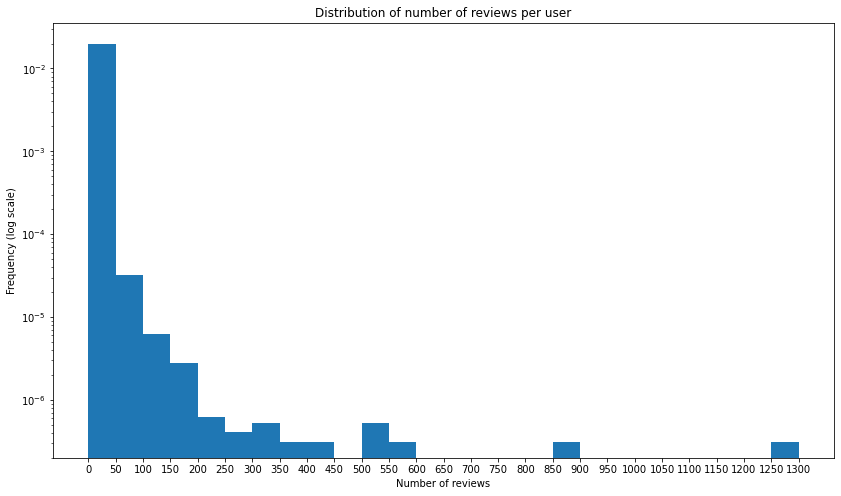

In [0]:
fig, ax = plt.subplots()
r = range(0, 1301, 50)
df.plot.hist(ax=ax, bins=r, figsize=(14, 8), xticks=r, density=True, bottom=2e-7)
ax.set_yscale('log')
ax.set_title('Distribution of number of reviews per user')
ax.set_ylabel('Frequency (log scale)')
ax.set_xlabel('Number of reviews')
ax.get_legend().remove()

In [0]:
len(num_reviews_ps[num_reviews_ps > 5]) / len(num_reviews_ps)

Out[103]: 0.05844727296142866

70% of users only published a single review.

#### Review Languages

In [0]:
!pip install langdetect

In [0]:
def get_languages(reviews_df):
  from langdetect import detect
  langs = pd.DataFrame(columns=['review_id', 'lang'])

  excluded_rows = []

  for row in reviews_df:
    try:
      lang = pd.Series(data={'review_id':row.review_id, 'lang':detect(row.review)})
    except:
      excluded_rows.append(row)
    langs = langs.append(lang, ignore_index=True)
  
  print("Excluded rows:", len(excluded_rows))
  return langs, excluded_rows

langs_df, excluded_rows = get_languages(reviews_df)

#ratings_df.withColumn('lang', get_language(ratings_df.review))

In [0]:
langs_df.to_csv('reviews_lang.csv') 

In [0]:
langs_df = pd.read_csv('/tmp/reviews_lang.csv')
top_langs = langs_df['lang'].value_counts().index[:10]
top_langs_df = langs_df[langs_df.lang.isin(top_langs)]

In [0]:
langs_df['lang'].value_counts()

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(14, 8))

ax = sns.countplot(x="lang", data=top_langs_df, order=top_langs)
ncount = len(langs_df)

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom')

## **Data Preprocessing**

### **Dataset Splitting: Training vs. Test Set**

Before moving along with any preprocessing involving data transformations, we will split our dataset into **2** portions:
- _training set_ (e.g., accounting for **80%** of the total number of instances);
- _test set_ (e.g., accounting for the remaining **20%** of instances)

In [0]:
(train_ratings_df, test_ratings_df) = ratings_df.randomSplit([0.8, 0.2], seed=RANDOM_SEED)

### Collaborative Filtering Data

In [0]:
games = games_df.select('game_name', 'game_id').dropDuplicates(['game_name',])
als_train_df = train_ratings_df.join(games, 'game_name').drop('review', 'game_name')
als_test_df = test_ratings_df.join(games, 'game_name').drop('review', 'game_name')
als_train_df.show(5)

+---------+---------+------+-------+
|review_id|player_id|rating|game_id|
+---------+---------+------+-------+
|        0|        0|   9.0|   3960|
|        1|        0|  10.0|  17984|
|        3|        2|  10.0|  16808|
|        4|        3|  10.0|  17581|
|        5|        4|  10.0|    191|
+---------+---------+------+-------+
only showing top 5 rows



### Content-Based Recommendations Data

In [0]:
df = games_df.select('game_id','game_name','release_date','genre','platforms','developer','metascore','userscore', 'summary').dropna()

In [0]:
df.count()

Out[242]: 17936

In [0]:
games_data_df = df.select('game_id', 'genre', 'platforms',
                     F.concat(
                         F.col('developer'),
                         F.lit(', '),
                         F.col('summary')
                     ).alias('description'),
                     (F.when(df.userscore.isNotNull(), (df.metascore *.1 + df.userscore)* .5)\
                       .otherwise(df.metascore))\
                     .alias('score')
).withColumn('description', F.regexp_replace('description', r"""[!\"#$%&'()*+,\-.\/:;<=>?@\[\\\]^_`{|}~]""", ""))\
.withColumn('description', F.trim(F.regexp_replace("description", r"  ", " ")))\
.withColumn('genre', F.trim(F.regexp_replace("genre", r",", "")))\
.withColumn('platforms', F.trim(F.regexp_replace("platforms", r" ", "")))\
.withColumn('platforms', F.trim(F.regexp_replace("platforms", r",", "")))

In [0]:
games_data_df.show(5)

+-------+--------------------+------------+--------------------+-----------------+
|game_id|               genre|   platforms|         description|            score|
+-------+--------------------+------------+--------------------+-----------------+
|      0|Driving Racing Ar...|        Xbox|Criterion Games B...|8.549999904632568|
|      1|Action Platformer 3D|   Dreamcast|Smilebit Join a g...|8.850000095367431|
|      2|Action Adventure ...|PlayStation3|Kojima Production...|9.100000095367431|
|      3|Action Adventure ...|        Xbox|Ubisoft Montreal ...|9.250000190734863|
|      4|Action Shooter Sh...|     Xbox360|Infinity Ward Mod...|7.999999952316284|
+-------+--------------------+------------+--------------------+-----------------+
only showing top 5 rows



In [0]:
games_data_df.select([F.count(F.when(F.col(c).isNull(), c)).alias(c) for c in games_data_df.columns]
   ).show()

+-------+-----+---------+-----------+-----+
|game_id|genre|platforms|description|score|
+-------+-----+---------+-----------+-----+
|      0|    0|        0|          0|    0|
+-------+-----+---------+-----------+-----+



# Collaborative Filtering

In [0]:
train_df, test_df = als_train_df, als_test_df

In [0]:
print("Training set size: {:d} instances".format(train_df.count()))
print("Test set size: {:d} instances".format(test_df.count()))

Training set size: 333138 instances
Test set size: 83481 instances


## **Matrix Factorization using Alternating Least Squares (ALS)**

We use ALS to factorize the mxn user-movie matrix R into the product of two lower rank matrices: the mxd **user-factor matrix** M and the nxd **item-factor matrix** W, using the training set above. To do so, we use the blocked implementation of ALS (i.e., the `ALS` object) provided by the [PySpark API](https://spark.apache.org/docs/2.2.0/api/python/pyspark.ml.html?highlight=als#pyspark.ml.recommendation.ALS) within the package `pyspark.ml.recommendation`.

The general approach is iterative. During each iteration, one of the factor matrices is held constant, while the other is solved for using least squares. The newly-solved factor matrix is then held constant while solving for the other factor matrix

Among all the parameters that the API offers, the following deserve specific attention:

- `rank` is the rank of the user and item factor matrices $X$ and $W$, i.e., the number of latent features $d$ (by deafult `rank=10`);
- `maxIter` is the maximum number of iterations performed (by default `maxIter=10`);
- `regParam` is the regularization parameter (by default `regParam=0.1`);
- `implicitPrefs` is a boolean flag to switch between using only explicit or implicit feedback version of ALS (by default `implicitPrefs=false`);
- `coldStartStrategy` indicates the strategy for dealing with unknown or new users/items at prediction time (i.e., cold-start). This may be useful in cross-validation or production scenarios, for handling users/items that the model have not seen in the training data. Supported values are `nan` (default) or `drop`;
- `numUserBlocks`/`numItemBlocks` indicate the number of blocks to process in parallel (by default both are set to `10`, set those to `-1` to allow Spark to autoconfigure those).

As it is always the case, the optimal values of the **hyperparameters** above should be tuned using a dedicated portion of the dataset (i.e., **validation set**) or by performing $k$**-fold cross validation**.

### **Model Training**

In [0]:
from pyspark.ml.recommendation import ALS
# Build the recommendation model using ALS on the training data
als = ALS(maxIter=50, regParam=0.01, userCol="player_id", itemCol="game_id", ratingCol="rating", nonnegative=True, coldStartStrategy='drop')
model = als.fit(train_df)

### **Making Rating Predictions on the Test Set**

In [0]:
predictions =  model.transform(test_df)

In [0]:
predictions.show(5)

### **Measuring Model's Performance**

We will use Root Mean Squared Error (RMSE) measured on the held-out portion to assess the quality of our movie recommender system.

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator

evaluator = RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction")
rmse = evaluator.evaluate(predictions)

print("Root Mean Squared Error = {:.5f}".format(rmse))

### **Tuning Hyperparameters**

In the following, we try to summarize the whole pipeline making use also of $k$-fold cross validation to get a better estimate of the generalization performance of our matrix factorization model.

More specifically, we will tune the three hyperparameters: `rank`, `regParam`, and `maxIter`.

In [0]:
# This function defines the general pipeline for logistic regression
def matrix_factorization(train, k_fold=5):

    from pyspark.ml.recommendation import ALS
    from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
    from pyspark.ml.evaluation import RegressionEvaluator
    from pyspark.ml import Pipeline

    als = ALS(userCol="player_id", itemCol="game_id", ratingCol="rating", coldStartStrategy="drop")

    #pipeline = Pipeline(stages=stages)

    # We use a ParamGridBuilder to construct a grid of parameters to search over.
    # A CrossValidator requires an Estimator, a set of Estimator ParamMaps, and an Evaluator.
    # We use a ParamGridBuilder to construct a grid of parameters to search over.
    # With 2 values for als.rank, 2 values for als.regParam, and 1 value for als.maxIter,
    # this grid will have 2 x 2 x 1 = 4 parameter settings for CrossValidator to choose from.
    param_grid = ParamGridBuilder()\
    .addGrid(als.rank, [10, 25, 40]) \
    .addGrid(als.regParam, [0.1, 0.25, 0.5]) \
    .addGrid(als.maxIter, [20]) \
    .build()
    
    cross_val = CrossValidator(estimator=als, 
                               estimatorParamMaps=param_grid,
                               evaluator=RegressionEvaluator(metricName="rmse", labelCol="rating", predictionCol="prediction"),
                               numFolds=k_fold,
                               collectSubModels=True # this flag allows us to store ALL the models trained during k-fold cross validation
                               )

    # Run cross-validation, and choose the best set of parameters.
    cv_model = cross_val.fit(train)

    return cv_model

In [0]:
cv_model = matrix_factorization(train_df)

In [0]:
# This function summarizes all the models trained during k-fold cross validation
def summarize_all_models(cv_models):
    for k, models in enumerate(cv_models):
        print("*************** Fold #{:d} ***************\n".format(k+1))
        for i, m in enumerate(models):
            print("--- Model #{:d} out of {:d} ---".format(i+1, len(models)))
            print("\tParameters: rank=[{:d}]".format(m.rank))
            print("\tModel summary: {}\n".format(m))
        print("***************************************\n")

In [0]:
# Call the function above|
summarize_all_models(cv_model.subModels)

In [0]:
for i, avg_rmse in enumerate(cv_model.avgMetrics):
    print("Avg. RMSE computed across k-fold cross validation for model setting #{:d}: {:.3f}".format(i+1, avg_rmse))

In [0]:
print("Best model according to k-fold cross validation: rank=[{:d}]".
      format(cv_model.bestModel.rank)
      )
print(cv_model.bestModel)

In [0]:
# Make predictions on the test set (`cv_model` contains the best model according to the result of k-fold cross validation)
# `test_df` will follow exactly the same pipeline defined above, and already fit to `train_df`
test_predictions = cv_model.transform(test_df)

In [0]:
test_predictions.select("player_id", "game_id", "rating", "prediction").show(5)

In [0]:
def evaluate_model(predictions, metric="rmse", labelCol="rating", predictionCol="prediction"):
    
    from pyspark.ml.evaluation import RegressionEvaluator

    evaluator = RegressionEvaluator(metricName=metric, labelCol=labelCol, predictionCol=predictionCol)

    return evaluator.evaluate(predictions)

In [0]:
print("***** Test Set *****")
print("RMSE: {:.3f}".format(evaluate_model(test_predictions)))
print("***** Test Set *****")

# **Content-based recommendations**

In [0]:
database_df = games_data_df.sample(fraction=0.2, seed=RANDOM_SEED)

In [0]:
print("Database set size: {:d} instances".format(database_df.count()))

Database set size: 3694 instances


In [0]:
db_names = database_df.join(games_df.select('game_id', 'game_name'), 'game_id')

In [0]:
searchfor = ['Halo', 'Crash']
db_names.where(F.col('game_name').rlike('|'.join(searchfor))).show()

+-------+--------------------+--------------+--------------------+------------------+--------------------+
|game_id|               genre|     platforms|         description|             score|           game_name|
+-------+--------------------+--------------+--------------------+------------------+--------------------+
|    220|Action Shooter Fi...|          Xbox|Bungie Software E...|  9.19999990463257|Halo: Combat Evolved|
|    256|Action Shooter Fi...|          Xbox|Bungie Software T...| 9.099999904632568|              Halo 2|
|    347|Action Shooter Sh...|       Xbox360|Bungie From the b...| 8.749999809265137|         Halo: Reach|
|    395|Action Platformer 3D|   PlayStation|Naughty Dog This ...|              9.05|Crash Bandicoot 3...|
|   1010|Action Shooter Fi...|   XboxSeriesX|343 Industries Wh...| 8.350000000000001|       Halo Infinite|
|   1097|Action Platformer 3D|  PlayStation5|Gearbox Software ...|               7.8|Crash Bandicoot 4...|
|   3590|Strategy Real-Tim...|       

### 1st Technique

#### Calculate game cosine similarities

In [0]:
from pyspark.ml.feature import Tokenizer, StopWordsRemover
tokenizer = Tokenizer(inputCol='description',outputCol='tokens')
tokenizer1 = Tokenizer(inputCol='genre',outputCol='genre_tokens')
tokenizer2 = Tokenizer(inputCol='platforms',outputCol='platforms_tokens')
sw = StopWordsRemover.loadDefaultStopWords('english')
stopwordRemover = StopWordsRemover(inputCol='tokens',outputCol='filtered_tokens', stopWords=sw)

In [0]:
from pyspark.ml.feature import IDF, CountVectorizer
cv = CountVectorizer(inputCol="filtered_tokens", outputCol="tf")
cv1 = CountVectorizer(inputCol="genre_tokens", outputCol="genre_tf")
cv2 = CountVectorizer(inputCol="platforms_tokens", outputCol="platforms_tf")

idf = IDF(inputCol="tf", outputCol="feature")
idf1 = IDF(inputCol="genre_tf", outputCol="feature1")
idf2 = IDF(inputCol="platforms_tf", outputCol="feature2")

In [0]:
from pyspark.ml.feature import Normalizer
normalizer = Normalizer(inputCol="feature", outputCol="norm")
normalizer1 = Normalizer(inputCol="feature1", outputCol="norm_genre")
normalizer2 = Normalizer(inputCol="feature2", outputCol="norm_platforms")

In [0]:
from pyspark.ml import Pipeline
pipeline = Pipeline(
    stages = [tokenizer, tokenizer1, tokenizer2, stopwordRemover, cv, cv1, cv2, idf, idf1, idf2, normalizer, normalizer1, normalizer2]
    )

In [0]:
model = pipeline.fit(database_df)

In [0]:
data = model.transform(database_df).select('game_id', 'score', 'norm', 'norm_genre', 'norm_platforms')

In [0]:
data.show(5)

+-------+-----------------+--------------------+--------------------+---------------+
|game_id|            score|                norm|          norm_genre| norm_platforms|
+-------+-----------------+--------------------+--------------------+---------------+
|      7|9.000000190734863|(24524,[4,6,13,28...|(184,[0,5,11],[0....| (22,[0],[1.0])|
|     16|             9.15|(24524,[1,2,12,78...|(184,[19,20,24,45...|(22,[17],[1.0])|
|     18|             9.15|(24524,[3,5,11,17...|(184,[4,19,24],[0...| (22,[4],[1.0])|
|     26|9.050000095367432|(24524,[3,5,10,24...|(184,[0,5,11,59],...| (22,[0],[1.0])|
|     36|8.800000095367432|(24524,[1,2,3,6,7...|(184,[10,16,30,80...| (22,[0],[1.0])|
+-------+-----------------+--------------------+--------------------+---------------+
only showing top 5 rows



In [0]:
data_cross = data.select('game_id', 'norm', 'norm_genre', 'norm_platforms').crossJoin(data.select(F.col('game_id').alias('game_id1'), F.col('norm').alias('norm1'), F.col('norm_genre').alias('norm_genre1'), F.col('norm_platforms').alias('norm_platforms1')))

In [0]:
data_cross.filter((data_cross.game_id1 == 963) & (data_cross.game_id==3285)).show()

+-------+--------------------+--------------------+--------------+--------+--------------------+--------------------+---------------+
|game_id|                norm|          norm_genre|norm_platforms|game_id1|               norm1|         norm_genre1|norm_platforms1|
+-------+--------------------+--------------------+--------------+--------+--------------------+--------------------+---------------+
|   3285|(24524,[1,2,4,12,...|(184,[0,5,11],[0....|(22,[0],[1.0])|     963|(24524,[1,4,6,12,...|(184,[0,5,11],[0....| (22,[0],[1.0])|
+-------+--------------------+--------------------+--------------+--------+--------------------+--------------------+---------------+



In [0]:
def cos_similarity(arr1, arr2):
    return float(arr1.dot(arr2))

cos_sim = F.udf(cos_similarity)

data_df = data_cross.select('game_id', 'game_id1',
                           cos_sim(F.col('norm'), F.col('norm1')).alias('similarity'), 
                           cos_sim(F.col('norm_genre'), F.col('norm_genre1')).alias('similarity_genre'),
                           cos_sim(F.col('norm_platforms'), F.col('norm_platforms1')).alias('similarity_platforms'))

In [0]:
games_similarities_df = data_df.filter(data_df.game_id != data_df.game_id1).sort('similarity_platforms', 'similarity_genre', 'similarity', ascending=True)

In [0]:
games_similarities_df.count()

Out[71]: 13641942

#### Read similarities from file

In [0]:
similaritiesSchema = StructType([
StructField("game_id1", IntegerType()),
StructField("game_id2", IntegerType()),
StructField("similarity", FloatType()),
StructField("similarity_genre", FloatType()),
StructField("similarity_platforms", FloatType()),
])

games_similarities_df = spark.read.csv(SIMILARITIES_DIR, lineSep="\n", escape='"', sep=",", inferSchema=True, header=False, schema=similaritiesSchema).dropDuplicates(['game_id1', 'game_id2'])

In [0]:
games_similarities_df.sort('similarity_platforms', 'similarity_genre', 'similarity', ascending=False).filter((games_similarities_df.game_id2 == 963) & (games_similarities_df.game_id1 == 3285)).show(5)
games_similarities_df.persist()

+--------+--------+----------+----------------+--------------------+
|game_id1|game_id2|similarity|similarity_genre|similarity_platforms|
+--------+--------+----------+----------------+--------------------+
|    3285|     963|0.08679232|             1.0|                 1.0|
|    3285|     963|0.08488944|             1.0|                 1.0|
|    3285|     963|0.08488944|             1.0|                 1.0|
+--------+--------+----------+----------------+--------------------+

Out[65]: DataFrame[game_id1: int, game_id2: int, similarity: float, similarity_genre: float, similarity_platforms: float]

In [0]:
games_similarities_df.count()

Out[73]: 13641942

In [0]:
games_rec_db = games_similarities_df.join(games_data_df.select(F.col('game_id').alias('game_id2'), 'score'), 'game_id2').drop('game_id')
games_rec_db.show(5)

+--------+--------+-----------+----------------+--------------------+------------------+
|game_id2|game_id1| similarity|similarity_genre|similarity_platforms|             score|
+--------+--------+-----------+----------------+--------------------+------------------+
|    2782|   11393| 0.21306856|             1.0|                 1.0|               8.7|
|   15656|   14775| 0.17866185|             1.0|                 1.0| 6.049999952316284|
|    2571|   10239| 0.03534316|             1.0|                 1.0| 8.250000095367433|
|    9331|   17213|0.027603108|             1.0|                 1.0|7.3000000476837155|
|    2138|     287|0.022249581|             1.0|                 1.0| 8.300000095367432|
+--------+--------+-----------+----------------+--------------------+------------------+
only showing top 5 rows



In [0]:
sim_min = games_rec_db.agg({'score': 'min'}).collect()[0][0]
sim_max = games_rec_db.agg({'score': 'max'}).collect()[0][0]

In [0]:
games_rec_db = games_rec_db.withColumn('recomm_score', 0.3*((games_rec_db.similarity - sim_min) / (sim_max-sim_min) ) + 0.2*games_rec_db.similarity_genre + 0.2*games_rec_db.similarity_platforms + 0.03*games_rec_db.score)

In [0]:
games_rec_db.filter(games_rec_db.game_id1.isin([7,])).sort('recomm_score', ascending=False).show(5)

+--------+--------+-----------+----------------+--------------------+-----------------+------------------+
|game_id2|game_id1| similarity|similarity_genre|similarity_platforms|            score|      recomm_score|
+--------+--------+-----------+----------------+--------------------+-----------------+------------------+
|     963|       7| 0.03292204|             1.0|                 1.0|8.850000000000001|0.5972717396018659|
|     147|       7|0.002545681|       0.9575876|                 1.0|             8.95|0.5905822519213066|
|    1170|       7|0.010674749|             1.0|                 1.0|8.599999809265137|0.5888877355432995|
|    4307|       7|0.030610127|             1.0|                 1.0|8.249999809265137|0.5791798697779309|
|    2927|       7|0.023884436|             1.0|                 1.0|8.100000047683716|0.5744126309277959|
+--------+--------+-----------+----------------+--------------------+-----------------+------------------+
only showing top 5 rows



In [0]:
def find_recommendations_CB(game_ids, num_recommendations=10):
    from pyspark.sql.window import Window
    
    windowDept = Window.partitionBy("game_id1").orderBy(F.col("recomm_score").desc())
    scores_df = games_rec_db.filter(games_rec_db.game_id1.isin(game_ids))\
                          .withColumn("row",F.row_number().over(windowDept))\
                          .filter(F.col("row") <= num_recommendations / len(game_ids))
    
    recomm_df = games_df.join(scores_df.select('game_id2', 'recomm_score'), games_df.game_id == scores_df.game_id2).drop('game_id2')
    
    return recomm_df, scores_df

#### Check out recommendations

In [0]:
games_loved = [1097, 1010] # Halo: Infinite and Crash Bandicoot 4
best_recomm, scores = find_recommendations_CB(games_loved)
best_recomm.show()
scores.show()

+-------+--------------------+------------+--------------------+-------------+--------------------+-----------+-----+---------+---------+--------------+------------+----------------+--------------------+-------------------+
|game_id|           game_name|release_date|               genre|    platforms|           developer|esrb_rating|ESRBs|metascore|userscore|critic_reviews|user_reviews|     num_players|             summary|       recomm_score|
+-------+--------------------+------------+--------------------+-------------+--------------------+-----------+-----+---------+---------+--------------+------------+----------------+--------------------+-------------------+
|   1974|Destiny 2: The Wi...|Feb 22, 2022|Action, Shooter, ...|Xbox Series X|              Bungie|          M| null|     85.0|      8.0|           9.0|       255.0|        1 Player|The Definitive De...| 0.5786999181904169|
|   6092|         Lemnis Gate|Sep 28, 2021|Action, Shooter, ...|Xbox Series X|Ratloop Games Canada|     

In [0]:
row_list = best_recomm.select('game_name').collect()
games_names = [ row.game_name for row in row_list ]
print(games_names)

['Destiny 2: The Witch Queen', 'Lemnis Gate', 'Observer: System Redux', 'Road 96', 'Hot Wheels Unleashed', 'Cyber Shadow', 'Chivalry 2', "A Juggler's Tale", 'Martha is Dead', 'It Takes Two']


### Testing

Let's test it out using the game reviews.